In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

model = Sequential()
img_height, img_width = 128, 128

# Convolutional layer 1
model.add(Conv2D(16, kernel_size=(5, 5), strides=1, padding='same', input_shape=(img_height, img_width, 1)))  # Corrected stride to strides, padding value, and added input shape channel
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # Corrected stride to strides

# Convolutional layer 2
model.add(Conv2D(32, kernel_size=(3, 3), strides=1, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Fully connected layer 1
model.add(Flatten())
model.add(Dense(256, activation='relu'))
 
# Fully connected layer 2
model.add(Dense(10, activation='softmax'))

print(model.summary())  # Added model.summary() to view the model architecture


c:\Users\JOSHWIN ISAC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 16)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,396,490 (32.03 MB)

 Trainable params: 8,396,490 (32.03 MB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.layers import  Conv2D, MaxPooling2D,Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,auc

In [9]:
import os
import cv2
test_path="D:\\dataset for lab programs\\MY_data\\test"
classes=sorted(os.listdir(test_path))
tot_classes=len(classes)
print("Class names under test path:\n",classes)
print("no of classes:\n",tot_classes)

Class names under test path:
 ['apple', 'avocado', 'banana', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'stawberries', 'watermelon']
no of classes:
 10


In [10]:
train_path="D:\\dataset for lab programs\\MY_data\\train"
classes=sorted(os.listdir(train_path))
tot_classes=len(classes)
print("Class names under test path:\n",classes)
print("no of classes:\n",tot_classes)

Class names under test path:
 ['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']
no of classes:
 10


In [11]:
img_height, img_width = 224, 224

In [12]:
import os
import cv2
import numpy as np

train_path = "D:\\dataset for lab programs\\MY_data\\train"
img_height, img_width = 224, 224

def load_normalize_images(directory):
    images = []
    labels = []
    classes = sorted(os.listdir(directory))
    
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            # Load image using OpenCV
            img = cv2.imread(img_path)
            # Check if the image was successfully loaded
            if img is not None:
                # Resize the image
                img = cv2.resize(img, (img_height, img_width))

                # Convert the image to a numpy array and normalize the pixel values
                img = img / 255.0

                # Append normalized image and its label
                images.append(img)
                labels.append(class_name)
    
    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load and normalize images
images, labels = load_normalize_images(train_path)

train_images, train_labels = load_normalize_images(train_path)
test_images, test_labels = load_normalize_images(test_path)


In [13]:
train_data_gen=ImageDataGenerator(rescale = 1./255, 
                                  rotation_range=20, 
                                  zoom_range = 0.2, 
                                  width_shift_range=0.2, 
                                  height_shift_range=0.2, 
                                  horizontal_flip=True, 
                                  vertical_flip=False,
                                  validation_split=0.2)

In [14]:
test_data_gen=ImageDataGenerator(rescale = 1./255, 
                                  rotation_range=20, 
                                  zoom_range = 0.2, 
                                  width_shift_range=0.2, 
                                  height_shift_range=0.2, 
                                  horizontal_flip=True, 
                                  vertical_flip=False,
                                  validation_split=0.2)

In [16]:
validation_gen=ImageDataGenerator(rescale = 1./255, 
                                  rotation_range=20, 
                                  zoom_range = 0.2, 
                                  width_shift_range=0.2, 
                                  height_shift_range=0.2, 
                                  horizontal_flip=True, 
                                  vertical_flip=False,
                                  validation_split=0.2)

In [17]:
# Generate training data
train_generator = train_data_gen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Training data subset
)

Found 1841 images belonging to 10 classes.


In [18]:
validation_generator=test_data_gen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training')

Found 822 images belonging to 10 classes.


In [19]:
#CustomCNN
model_CNN=Sequential()
model_CNN.add(Input(shape=(224,224,3)))


#add model layers here
model_CNN.add(Conv2D(32, (5, 5), activation="relu",padding="same"))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D((2,2),padding="same"))
model_CNN.add(Dropout(0.25))

#convolutional  layer 
model_CNN.add(Conv2D(64, (5, 5), activation="relu",padding="same"))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D((2,2),padding="same"))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(128, (5, 5), activation="relu",padding="same"))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D((2,2),padding="same"))
model_CNN.add(Dropout(0.25))
#Flatten then Dense Layer
model_CNN.add(Flatten())
model_CNN.add(Dense(256, activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(Dropout(0.5))

# Fully connected layer 2
model_CNN.add(Dense(10, activation='softmax'))

In [20]:
model_CNN.compile(optimizer='adam',loss='crossentropy',metrics=['accuracy'])
model_CNN.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,953,482 (99.00 MB)

 Trainable params: 25,952,522 (99.00 MB)

 Non-trainable params: 960 (3.75 KB)

In [23]:
history=model_CNN.fit(train_generator,epochs=2, validation_data = validation_generator)

Epoch 1/2
58/58 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.4390 - loss: 1.5915 - val_accuracy: 0.1582 - val_loss: 3.2229
Epoch 2/2
58/58 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.4914 - loss: 1.4383 - val_accuracy: 0.2701 - val_loss: 2.2039


In [24]:
#VGG 16
from tensorflow.keras.applications import VGG16

In [25]:

vgg16=VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg16.layers:
    layer.trainable = False

In [26]:
VGG_16_model=Sequential()
VGG_16_model.add(vgg16)
VGG_16_model.add(Flatten())
VGG_16_model.add(Dense(256,activation="relu"))
VGG_16_model.add(Dense(128,activation="relu"))
VGG_16_model.add(Dropout(0.5))
VGG_16_model.add(Dense(10,activation= "softmax")) # 10 classes of fruit dataset

In [27]:
VGG_16_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
VGG_16_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
history1=VGG_16_model.fit(train_generator,epochs=2,validation_data = validation_generator)

Epoch 1/2
58/58 ━━━━━━━━━━━━━━━━━━━━ 248s 4s/step - accuracy: 0.1773 - loss: 2.6857 - val_accuracy: 0.3625 - val_loss: 1.9503
Epoch 2/2
58/58 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.3876 - loss: 1.7689 - val_accuracy: 0.4051 - val_loss: 1.7359


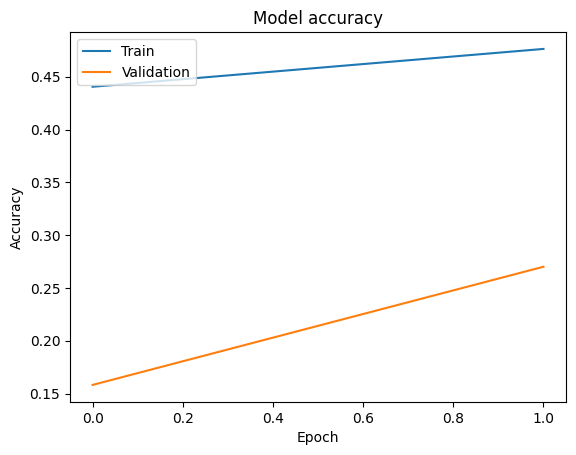

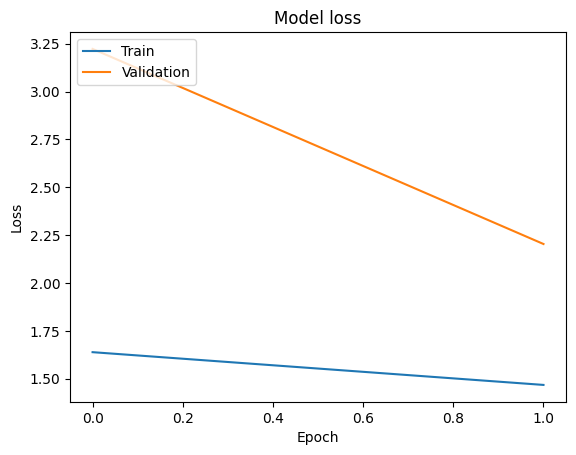

In [29]:
#Plotting 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


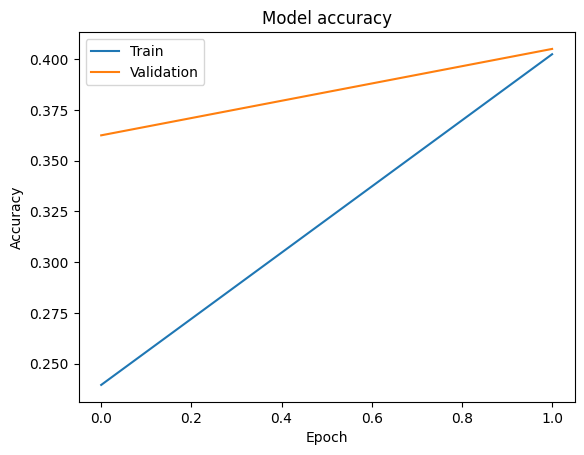

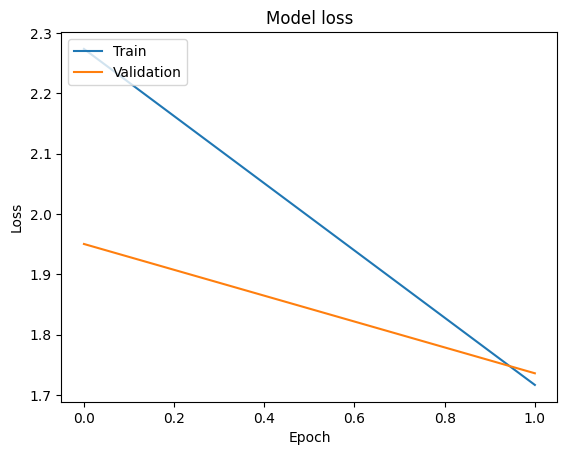

In [30]:
#Plotting 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


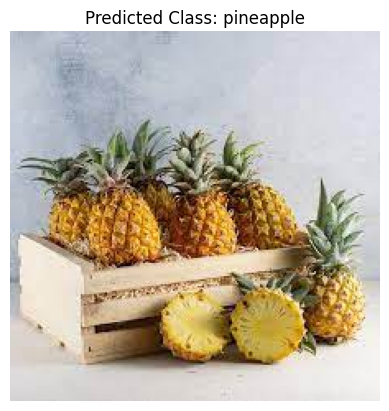

In [32]:
import cv2
import random
import numpy as np
import os
# Define the test dataset directory
test_path = "D:\\dataset for lab programs\\MY_data\\test"  # Update with your test dataset directory

# Get a random image path from the test dataset
random_class = random.choice(os.listdir(test_path))
random_image_path = os.path.join(test_path, random_class, random.choice(os.listdir(os.path.join(test_path, random_class))))

# Read and preprocess the randomly selected image
img = cv2.imread(random_image_path)
img = cv2.resize(img, (224, 224))
img = np.reshape(img, [1, 224, 224, 3])
img = img / 255

# Make predictions on the image
preds = model_CNN.predict(img)
max_idx = np.argmax(preds)

# Define class indices
class_indices = {0: 'apple', 1: 'avocado', 2: 'banana', 3: 'cherry', 4: 'kiwi', 
                 5: 'mango', 6: 'orange', 7: 'pineapple', 8: 'strawberries', 9: 'watermelon'}

# Get the predicted class label
predicted_class = class_indices[max_idx]

# Plot the image with the predicted class label
plt.imshow(cv2.cvtColor(cv2.imread(random_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


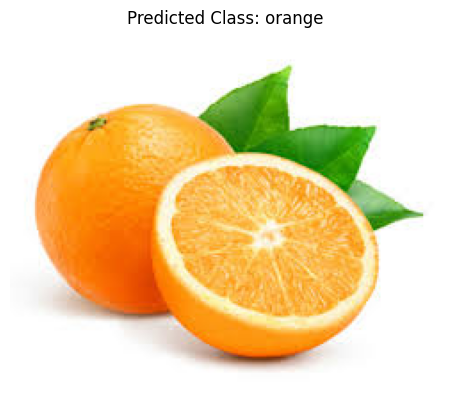

In [34]:
import cv2
import random
import numpy as np
import os
# Define the test dataset directory
test_path = "D:\\dataset for lab programs\\MY_data\\test"  # Update with your test dataset directory

# Get a random image path from the test dataset
random_class = random.choice(os.listdir(test_path))
random_image_path = os.path.join(test_path, random_class, random.choice(os.listdir(os.path.join(test_path, random_class))))

# Read and preprocess the randomly selected image
img = cv2.imread(random_image_path)
img = cv2.resize(img, (224, 224))
img = np.reshape(img, [1, 224, 224, 3])
img = img / 255

# Make predictions on the image
preds = VGG_16_model.predict(img)
max_idx = np.argmax(preds)

# Define class indices
class_indices = {0: 'apple', 1: 'avocado', 2: 'banana', 3: 'cherry', 4: 'kiwi', 
                 5: 'mango', 6: 'orange', 7: 'pineapple', 8: 'strawberries', 9: 'watermelon'}

# Get the predicted class label
predicted_class = class_indices[max_idx]

# Plot the image with the predicted class label
plt.imshow(cv2.cvtColor(cv2.imread(random_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()


In [35]:
test_labels={0: 'apple', 1: 'avocado', 2: 'banana', 3: 'cherry', 4: 'kiwi', 
                 5: 'mango', 6: 'orange', 7: 'pineapple', 8: 'strawberries', 9: 'watermelon'}

#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score,f1_score

custom_CNNmodel_predictions = model_CNN.predict(test_images)
custom_CNNmodel_predictions = (custom_CNNmodel_predictions > 0.5).astype(int)

print("Classification Report for custom_cnn:")
print(classification_report(test_labels, custom_CNNmodel_predictions))

33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 426ms/step
Classification Report for custom_cnn:


ValueError: Found input variables with inconsistent numbers of samples: [10, 1025]

in conclusion we can see that VGG 16 is the best model  when compared to custom CNN model as the accuracy to predict the each 10 labels that are classified  having higher accuracy  compared to custom CNN model also as we see here the no of epochs is 2 but if we increase the no of epochs we can achieve both models to be trained better

in terms of time VGG-16 takes a lot time to complete one epoch when compared to the custom CNN model